<font size='8'>Salary Prediction</font>

In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.width', 1000)

<font size='4'>Read data</font>

In [50]:
FILE_NAME = "Salary_Data.csv"
df = pd.read_csv(FILE_NAME, delimiter=',')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


<font size='4'>Save a copy data</font>

In [51]:
# df_raw = df.copy()
# df_raw

<font size='6'>Data Cleansing</font>

<font size='4'>Rename columns</font>

In [52]:
print(df.columns)
def cleaning_rename_cols(df):
    df.columns = [col.replace(' ', '_').lower() for col in df.columns]
    print('rename column - Successful ...')

cleaning_rename_cols(df)
print(df.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary'], dtype='object')
rename column - Successful ...
Index(['age', 'gender', 'education_level', 'job_title', 'years_of_experience', 'salary'], dtype='object')


<font size='4'>Check columns values</font>

In [53]:
for col in df.columns:
    # print(f"{col}:\n{df[col].info()}", end='\n\n')
    print(f"{col}:\n"
          f"null: {df[col].isnull().any()}\n"
          f"NaN:  {df[col].isna().any()}", end='\n\n')

age:
null: True
NaN:  True

gender:
null: True
NaN:  True

education_level:
null: True
NaN:  True

job_title:
null: True
NaN:  True

years_of_experience:
null: True
NaN:  True

salary:
null: True
NaN:  True



<font size='3'>remove Target column missing value rows</font>

In [54]:
# df = df.dropna(subset=['salary']).reset_index()          # create index column, keep all index
def cleaning_nan_salary(df) -> pd.DataFrame:
    return df.dropna(subset=['salary']).reset_index(drop=True)

df = cleaning_nan_salary(df)
# cleaning_nan_salary(df)
print(f'NaN: {df['salary'].isna().any()}')
print(f'null: {df['salary'].isnull().any()}')


NaN: False
null: False


<font size='3'>check Target column outliner, and address it</font>

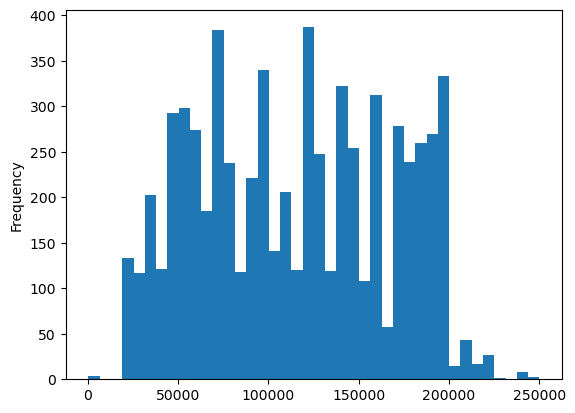

In [55]:
# plt.hist(df['salary'], bins=32)
# sns.violinplot(x=df['salary'])
df['salary'].plot(kind='hist', bins=40)
plt.show()

<font size='3'>check minimum, remove unreasonable data</font>

In [56]:
print(df.sort_values(by=['salary']).head(10), end='\n\n')

def cleaning_remove_salary_outlier(df, lower_bound=10000) -> pd.DataFrame:
    df['salary'] = df['salary'].astype('int32')
    df = df[df['salary'] > lower_bound]
    return df

df = cleaning_remove_salary_outlier(df)
print(df.sort_values(by=['salary']).head(10))

       age  gender    education_level                           job_title  years_of_experience   salary
258   29.0    Male         Bachelor's  Junior Business Operations Analyst                  1.5    350.0
4630  31.0  Female  Bachelor's Degree               Junior HR Coordinator                  4.0    500.0
1888  25.0  Female  Bachelor's Degree                 Front end Developer                  1.0    550.0
2652  23.0    Male                PhD           Software Engineer Manager                  1.0    579.0
4920  21.0  Female        High School         Junior Sales Representative                  0.0  25000.0
4933  21.0  Female        High School         Junior Sales Representative                  0.0  25000.0
4946  21.0  Female        High School         Junior Sales Representative                  0.0  25000.0
4959  21.0  Female        High School         Junior Sales Representative                  0.0  25000.0
4972  21.0  Female        High School         Junior Sales Repre

<font size='3'>check maximum, remove unreasonable data</font>

In [57]:
print(df.sort_values(by=['salary'], ascending=False).head(10), end='\n\n')

# def remove_outlier_upper(df, col, upper_bound=10000):
#     return df[df[col] < upper_bound]


# df = remove_outlier_lower(df, 'salary')
# print(df.sort_values(by=['salary']).tail(10))

       age gender    education_level                 job_title  years_of_experience  salary
4998  45.0   Male  Bachelor's Degree         Financial Manager                 21.0  250000
30    50.0   Male         Bachelor's                       CEO                 25.0  250000
83    52.0   Male                PhD  Chief Technology Officer                 24.0  250000
4378  51.0   Male                PhD            Data Scientist                 24.0  240000
4273  51.0   Male                PhD            Data Scientist                 24.0  240000
4288  51.0   Male                PhD            Data Scientist                 24.0  240000
4303  51.0   Male                PhD            Data Scientist                 24.0  240000
4348  51.0   Male                PhD            Data Scientist                 24.0  240000
4363  51.0   Male                PhD            Data Scientist                 24.0  240000
4318  51.0   Male                PhD            Data Scientist                 2

In [58]:
def cleaning_salary(df):
    df = cleaning_nan_salary(df)
    print("cleaning nan salary - Successful ...")
    df = cleaning_remove_salary_outlier(df)
    print("cleaning salary outlier - Successful ...")
    return df

df = cleaning_salary(df)
df

cleaning nan salary - Successful ...
cleaning salary outlier - Successful ...


,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000
1,28.0,Female,Master's,Data Analyst,3.0,65000
2,45.0,Male,PhD,Senior Manager,15.0,150000
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000
4,52.0,Male,Master's,Director,20.0,200000
...,...,...,...,...,...,...
6690,49.0,Female,PhD,Director of Marketing,20.0,200000
6691,32.0,Male,High School,Sales Associate,3.0,50000
6692,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000
6693,46.0,Male,Master's Degree,Marketing Manager,14.0,140000


In [59]:
# def remove_outlier(df, col, t_fac=2.5):
#     ## version 1
#     # mean_ = df[col].mean()
#     # std_ = df[col].std()
#     # upper_bound = mean_ + t_fac * std_
#     # lower_bound = mean_ - t_fac * std_


#     ## version 2
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     IQR = t_fac * (q3 - q1)
#     upper_bound, lower_bound = q3 + IQR, q1 - IQR

#     return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# df = remove_outlier(df, 'salary', t_fac=0.7)

# df['salary'].plot(kind='hist', bins=40)
# plt.show()

<font size='4'>Check again columns values</font>

In [60]:
for col in df.columns:
    print(f"{col}:\n"
          f"null: {df[col].isnull().any()}\n"
          f"NaN: {df[col].isna().any()}", end='\n\n')

age:
null: False
NaN: False

gender:
null: False
NaN: False

education_level:
null: True
NaN: True

job_title:
null: False
NaN: False

years_of_experience:
null: False
NaN: False

salary:
null: False
NaN: False



<font size='4'>Check each feature(column)</font>

<font size='3'>feature: age</font>

In [61]:
df['age'].unique() # no NaN

def cleaning_age(df):
    # df.loc[:, 'age'] = df['age'].astype('int32')
    df['age'] = df['age'].astype('int32')
    print('cleaning age - Successful ...')

cleaning_age(df)
df['age'].unique()

cleaning age - Successful ...


array([32, 28, 45, 36, 52, 29, 42, 31, 26, 38, 48, 35, 40, 27, 44, 33, 39,
       25, 51, 34, 47, 30, 41, 37, 24, 43, 50, 46, 49, 23, 53, 61, 57, 62,
       55, 56, 54, 60, 58, 22, 21], dtype=int32)

<font size='3'>feature: gender</font>

In [62]:
df['gender'].unique() # no NaN


def cleaning_gender(df):
    mapping = {'Male': 'male', 'Female': 'female', 'Other': 'other'}
    # df.loc[:, 'gender'] = df['gender'].map(mapping).fillna(df['gender'])
    df['gender'] = df['gender'].map(mapping).fillna(df['gender'])
    print('cleaning gender - Successful ...')

cleaning_gender(df)
df['gender'].unique()

cleaning gender - Successful ...


array(['male', 'female', 'other'], dtype=object)

<font size='3'>feature: education_level</font>

In [63]:
df['education_level'].unique()

def cleaning_edu(df):
    el_str = df['education_level'].str.lower()
    # df.loc[:, 'education_level'] = np.select(
    df['education_level'] = np.select(
        condlist=[
            el_str.str.contains('bachelor', na=False),
            el_str.str.contains('master', na=False),
            el_str.str.contains('phd', na=False),
            el_str.str.contains('high school', na=False),
        ],
        choicelist=[
            'Bachelor',
            'Master',
            'PhD',
            'High School'
        ],
        default='No Specified',
    ).astype('str')
    print('cleaning education level - Successful ...')


cleaning_edu(df)
df['education_level'].unique()

cleaning education level - Successful ...


array(['Bachelor', 'Master', 'PhD', 'No Specified', 'High School'],
      dtype=object)

<font size='3'>feature: job_title</font>

In [64]:
print(df['job_title'].unique()[:10])

## removing prefix does not improve model performance
## so this function actually does not change anything
def cleaning_job(df):
    df.loc[:, 'job_title'] = (
        df['job_title']
        # .str
        # .replace(r'\b(Junior|Juniour|Senior)\b\s+', '', regex=True)
        .str.strip()
        .astype('str')
    )
    print('cleaning job title - Successful ...')

cleaning_job(df)
print(df['job_title'].unique()[:10])

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist']
cleaning job title - Successful ...
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist']


<font size='3'>feature: years_of_experience</font>

In [65]:
df['years_of_experience'].unique()

def cleaning_exp(df):
    # df.loc[:, 'years_of_experience'] = df['years_of_experience'].astype('float32')
    df['years_of_experience'] = df['years_of_experience'].astype('float32')
    print('cleaning years of experience - Successful ...')

cleaning_exp(df)
df['years_of_experience'].unique()

cleaning years of experience - Successful ...


array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. , 18. ,
        6. , 14. , 16. ,  0. , 22. , 19. ,  9. , 13. , 11. , 25. , 21. ,
        8. , 17. , 23. , 24. ,  0.5,  1.5, 31. , 30. , 28. , 33. , 27. ,
       34. , 29. , 26. , 32. ], dtype=float32)

In [66]:
def data_cleaning(df, has_target_columns=False):
    cleaning_rename_cols(df)
    if has_target_columns:
        df = cleaning_salary(df)
    cleaning_age(df)
    cleaning_gender(df)
    cleaning_edu(df)
    cleaning_job(df)
    cleaning_exp(df)

    print("... Finishing Cleaning Process ...")

data_cleaning(df, has_target_columns=True)

rename column - Successful ...
cleaning nan salary - Successful ...
cleaning salary outlier - Successful ...
cleaning age - Successful ...
cleaning gender - Successful ...
cleaning education level - Successful ...
cleaning job title - Successful ...
cleaning years of experience - Successful ...
... Finishing Cleaning Process ...


<font size='6'>Data Visualization</font>

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  6695 non-null   int32  
 1   gender               6695 non-null   object 
 2   education_level      6695 non-null   object 
 3   job_title            6695 non-null   object 
 4   years_of_experience  6695 non-null   float32
 5   salary               6695 non-null   int32  
dtypes: float32(1), int32(2), object(3)
memory usage: 235.5+ KB


In [68]:
gen_ord = ['female', 'male', 'other']
df['gender'] = pd.Categorical(df['gender'], categories=gen_ord, ordered=True)

edu_ord = ['No Specified', 'High School', 'Bachelor', 'Master', 'PhD']
df['education_level'] = pd.Categorical(df['education_level'], categories=edu_ord, ordered=True)

## set save images file
images_dir = os.path.join(os.getcwd(), 'images')
os.makedirs(images_dir, exist_ok=True)

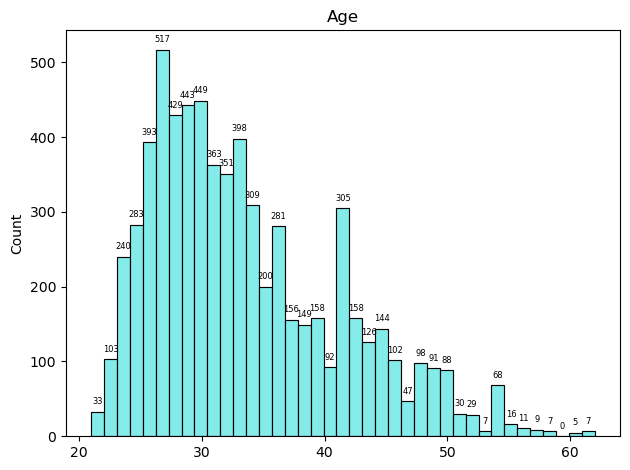

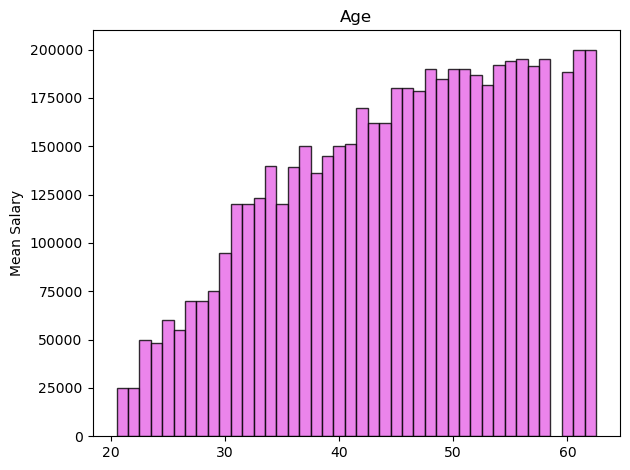

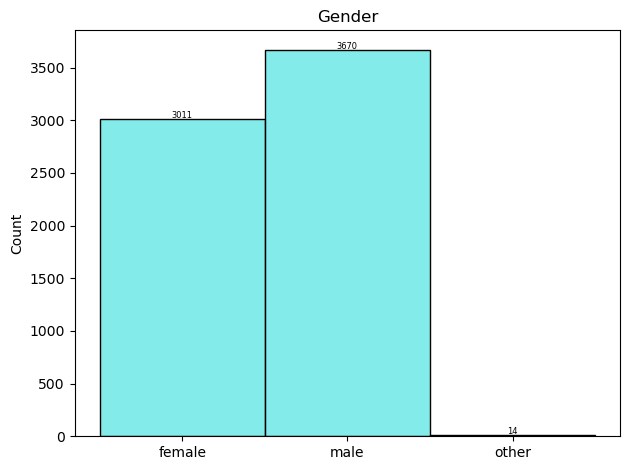

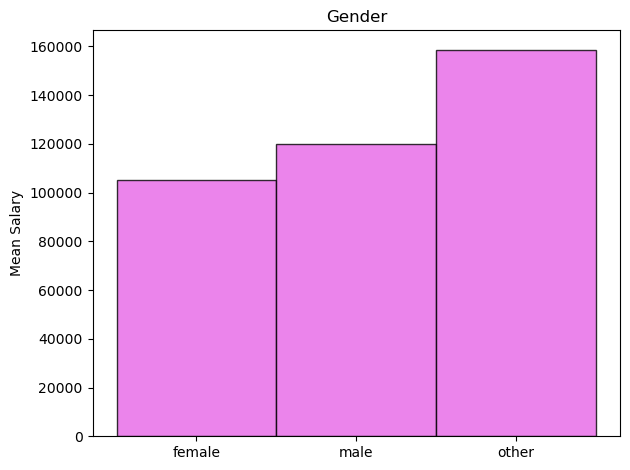

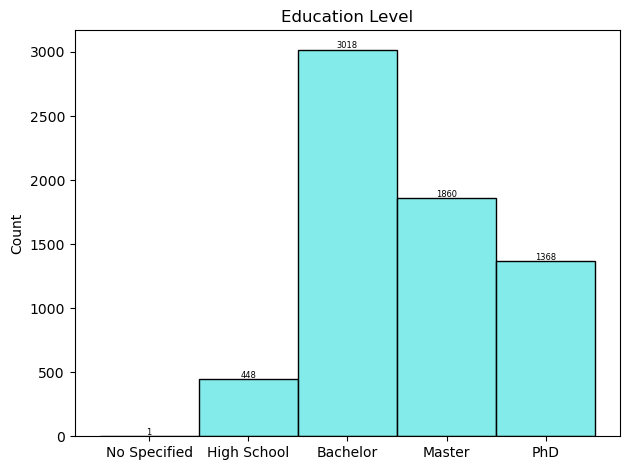

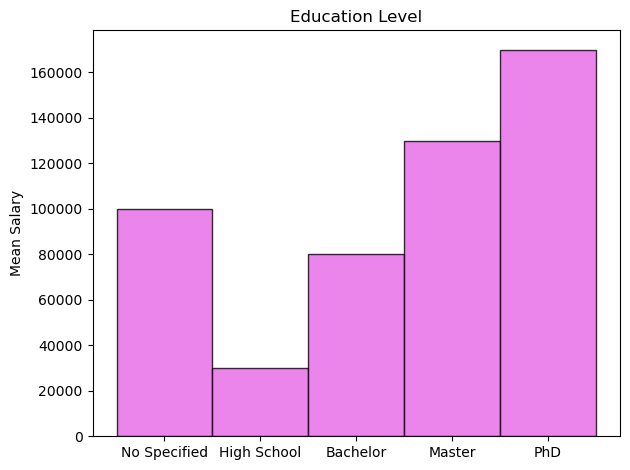

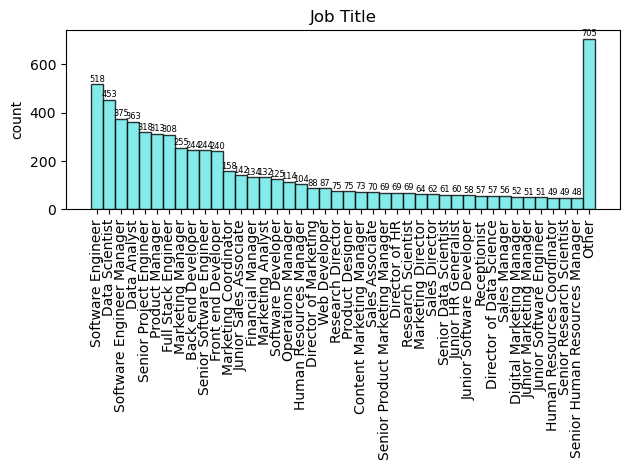

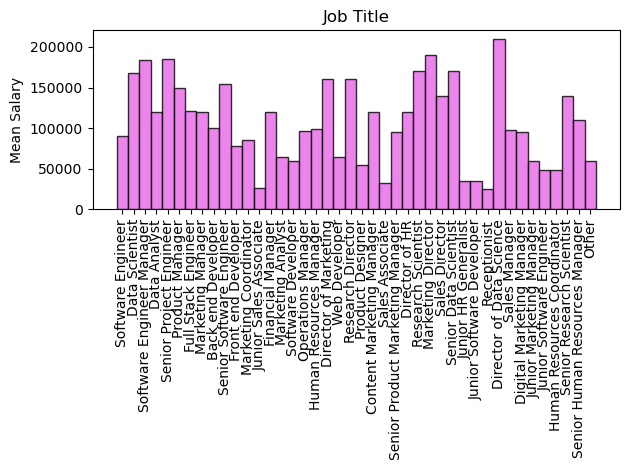

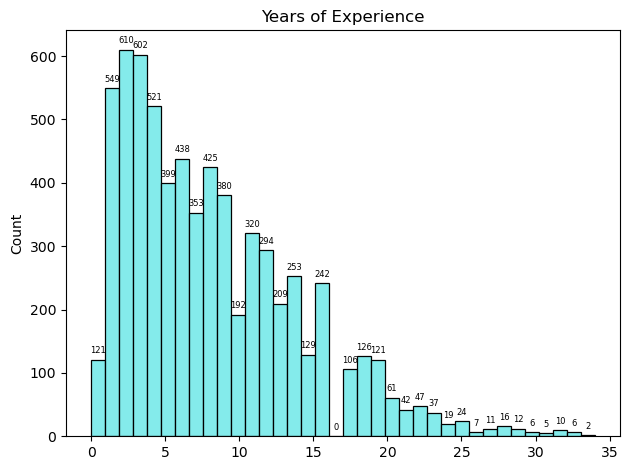

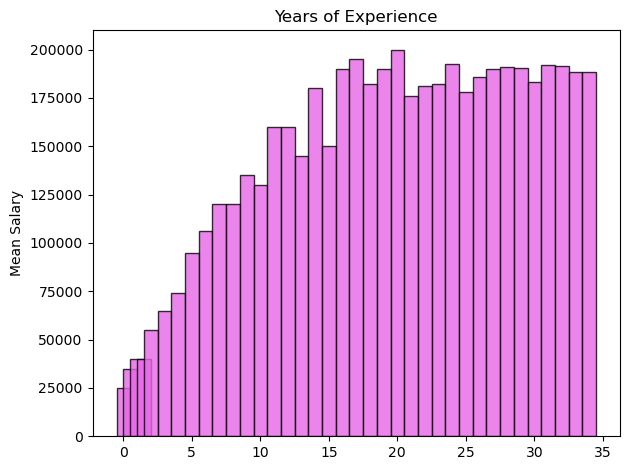

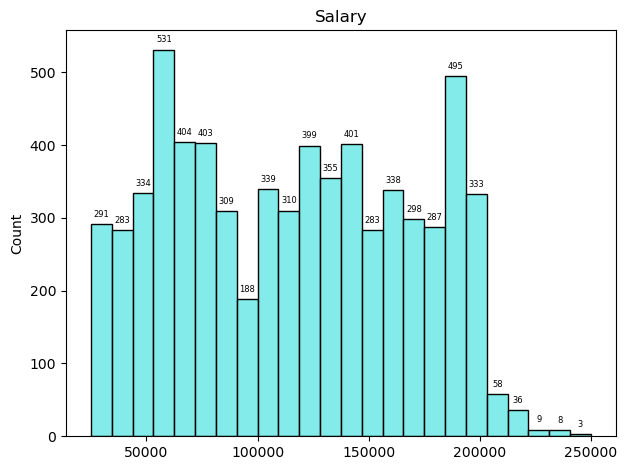

In [76]:
def show_plot(df, col):
    title_ = col

    ## show distribution
    if col == 'job_title':
        plt.xticks(rotation=90)

        ## group jobs that less than 45
        threshold = 45
        agg_job = df[col].value_counts()
        valid_job = agg_job[agg_job > threshold]
        valid_job.loc['Other'] = agg_job[agg_job <= threshold].sum()

        ## plot barplot
        bars = sns.barplot(data=valid_job,
                           color=(0.4, 0.9, 0.9),
                           edgecolor='black',
                           saturation=1,
                           alpha=0.8,
                           width=1)
        bars.margins(x=0.05)

    else :
        ## plot histgram
        bars = sns.histplot(data=df,
                            x=col,
                            color=(0.4, 0.9, 0.9),
                            alpha=0.8)

    ## indicate number on bar
    for bar in bars.patches:
        bbox = bar.get_bbox()
        x0 = bbox.x0
        width = bbox.width
        height = bbox.y1 - bbox.y0
        x_position = x0 + width / 2
        bars.text(x=x_position, y=height + 10,
                  s=f"{int(height)}",
                  ha='center',
                  fontsize=6)

    if '_' not in title_:
        title_ = title_[0].upper() + title_[1:]
    else :
        title_ = " ".join([n_split.capitalize()
                           if n_split != 'of'
                           else n_split
                           for n_split in title_.split('_')])

    plt.xlabel('')
    plt.title(title_)
    plt.tight_layout()

    ## save image
    fig_fname = f'{col}_distribution.png'
    plt.savefig(os.path.join(images_dir, fig_fname),
                bbox_inches='tight')

    ## plot image
    plt.show()

    if col == 'salary':
        return

    ## get feature mean|median|mode with target feature
    ## mode
    # d = (df
    #      .groupby([col], observed=False)['salary']
    #      .agg(lambda x: pd.Series.mode(x)[0]))
    ## quantile
    d = df.groupby([col], observed=False)['salary'].quantile(0.5)

    if col == 'job_title':
        plt.xticks(rotation=90)
        agg_job = df[col].value_counts()

        ## get job title that exceed threshold
        valid_job_index = agg_job[agg_job > threshold].index

        temp_ = df[[col, 'salary']].copy()
        ## create a df, remain jobs exceed threshold,
        ## set the rest jobs 
        temp_[col] = temp_[col].where(
            temp_[col].isin(valid_job_index), other='Other')
        
        ## mode
        # d = (temp_
        #      .groupby([col])['salary']
        #      .agg(lambda x: pd.Series.mode(x)[0]))
        ## quantile
        d = temp_.groupby([col], observed=False)['salary'].quantile(0.5)

        valid_job_index = list(valid_job_index) + ['Other']
        d = d.reindex(valid_job_index)

    plt.bar(d.index, d.values, width=1, color=(0.9, 0.4, 0.9),
            edgecolor='black', alpha=0.8)

    plt.xlabel('')
    plt.ylabel('Mean Salary')
    plt.title(title_)
    plt.tight_layout()

    ## save image
    fig_fname = f'{col}_salary_relation.png'
    plt.savefig(os.path.join(images_dir, fig_fname),
                bbox_inches='tight')

    ## plot image
    plt.show()




for col in df.columns:
    show_plot(df, col)

In [77]:
df_cleaned = df.copy()
df_cleaned

,age,gender,education_level,job_title,years_of_experience,salary
0,32,male,Bachelor,Software Engineer,5.0,90000
1,28,female,Master,Data Analyst,3.0,65000
2,45,male,PhD,Senior Manager,15.0,150000
3,36,female,Bachelor,Sales Associate,7.0,60000
4,52,male,Master,Director,20.0,200000
...,...,...,...,...,...,...
6690,49,female,PhD,Director of Marketing,20.0,200000
6691,32,male,High School,Sales Associate,3.0,50000
6692,30,female,Bachelor,Financial Manager,4.0,55000
6693,46,male,Master,Marketing Manager,14.0,140000


<font size='6'>Data Spliting</font>

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [80]:
# train set size = 0.8
# test set size  = 0.2

X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.2, random_state=34)

X_train
# y_train
X_test
# y_test

,age,gender,education_level,job_title,years_of_experience
1302,62,male,PhD,Software Engineer Manager,19.0
2821,35,male,Bachelor,Front end Developer,10.0
3591,43,female,PhD,Senior Human Resources Manager,15.0
1365,37,male,Master,Senior Software Engineer,9.0
1593,54,male,PhD,Software Engineer Manager,17.0
...,...,...,...,...,...
4599,27,female,Bachelor,Web Developer,2.0
3085,33,female,Master,Back end Developer,9.0
4396,45,male,Master,Marketing Manager,20.0
1716,50,male,PhD,Software Engineer Manager,17.0


<font size='6'>Data Preprocessing</font>

In [81]:
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    PolynomialFeatures,
    MinMaxScaler,
    # Normalizer,
)
from category_encoders import TargetEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(transform_output='pandas')


<font size='4' color='lightblue'>No Polynomial</font>

In [83]:
numeric_cols = ['age', 'years_of_experience']
onehot_cols = ['gender']
ord_cols = ['education_level']
ord_order = ['No Specified', 'High School', 'Bachelor', 'Master', 'PhD']
tar_cols = ['job_title']

In [84]:
numeric_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
])

onehot_pipe = Pipeline([
    ('one-hot', OneHotEncoder(sparse_output=False,
                              handle_unknown='ignore'))
])

ordinal_pipe = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[ord_order]))
])

target_pipe = Pipeline([
    ('tra_encode', TargetEncoder(cols=tar_cols)),
    ('tar_scaler', MinMaxScaler()),
])

set_config(transform_output='pandas')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipe, numeric_cols),
        ('cat_1', onehot_pipe, onehot_cols),
        ('cat_2', ordinal_pipe, ord_cols),
        ('tar', target_pipe, tar_cols),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
)

X_train_ = preprocessor.fit_transform(X_train, y_train)
X_train_

X_test_ = preprocessor.transform(X_test)
X_test_



,age,years_of_experience,gender_female,gender_male,gender_other,education_level,job_title
1302,1.000000,0.558824,0.0,1.0,0.0,4.0,0.847682
2821,0.341463,0.294118,0.0,1.0,0.0,2.0,0.329691
3591,0.536585,0.441176,1.0,0.0,0.0,4.0,0.486417
1365,0.390244,0.264706,0.0,1.0,0.0,3.0,0.719193
1593,0.804878,0.500000,0.0,1.0,0.0,4.0,0.847682
...,...,...,...,...,...,...,...
4599,0.146341,0.058824,1.0,0.0,0.0,2.0,0.223616
3085,0.292683,0.264706,1.0,0.0,0.0,3.0,0.429157
4396,0.585366,0.588235,0.0,1.0,0.0,3.0,0.515080
1716,0.707317,0.500000,0.0,1.0,0.0,4.0,0.847682


<font size='4' color='lightblue'>Polynomial</font>

In [85]:
poly_cols = X_train_.columns.difference([
    'gender_female',
    'gender_male',
    'gender_other'
])
poly_cols

Index(['age', 'education_level', 'job_title', 'years_of_experience'], dtype='object')

In [336]:
poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', MinMaxScaler()),

])

poly_transformer = ColumnTransformer(
    transformers=[
        ('num_poly', poly_pipe, poly_cols),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
)

X_train_poly = poly_transformer.fit_transform(X_train_, y_train)
X_train_poly
X_test_poly = poly_transformer.transform(X_test_)
X_test_poly

,age,education_level,job_title,years_of_experience,age^2,age education_level,age job_title,age years_of_experience,education_level^2,education_level job_title,education_level years_of_experience,job_title^2,job_title years_of_experience,years_of_experience^2,gender_female,gender_male,gender_other
1302,1.000000,1.00,0.847682,0.558824,1.000000,1.000000,1.000000,0.587481,1.0000,0.847682,0.558824,0.718565,0.558824,0.312284,0.0,1.0,0.0
2821,0.341463,0.50,0.329691,0.294118,0.116597,0.170732,0.132806,0.105581,0.2500,0.164845,0.147059,0.108696,0.114392,0.086505,0.0,1.0,0.0
3591,0.536585,1.00,0.486417,0.441176,0.287924,0.536585,0.307903,0.248869,1.0000,0.486417,0.441176,0.236601,0.253156,0.194637,1.0,0.0,0.0
1365,0.390244,0.75,0.719193,0.264706,0.152290,0.292683,0.331092,0.108597,0.5625,0.539395,0.198529,0.517239,0.224583,0.070069,0.0,1.0,0.0
1593,0.804878,1.00,0.847682,0.500000,0.647829,0.804878,0.804878,0.423077,1.0000,0.847682,0.500000,0.718565,0.500000,0.250000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,0.146341,0.50,0.223616,0.058824,0.021416,0.073171,0.038604,0.009050,0.2500,0.111808,0.029412,0.050004,0.015517,0.003460,1.0,0.0,0.0
3085,0.292683,0.75,0.429157,0.264706,0.085663,0.219512,0.148177,0.081448,0.5625,0.321868,0.198529,0.184176,0.134013,0.070069,1.0,0.0,0.0
4396,0.585366,0.75,0.515080,0.588235,0.342653,0.439024,0.355688,0.361991,0.5625,0.386310,0.441176,0.265308,0.357432,0.346021,0.0,1.0,0.0
1716,0.707317,1.00,0.847682,0.500000,0.500297,0.707317,0.707317,0.371795,1.0000,0.847682,0.500000,0.718565,0.500000,0.250000,0.0,1.0,0.0


<font size='4'>Show heatmap in all features</font>

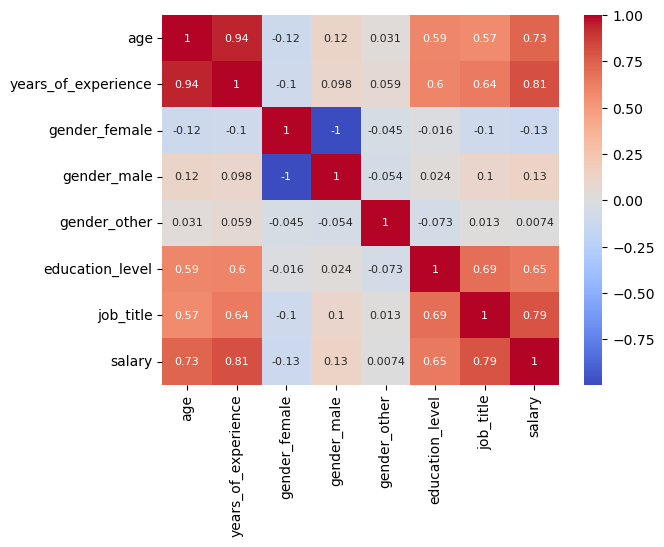

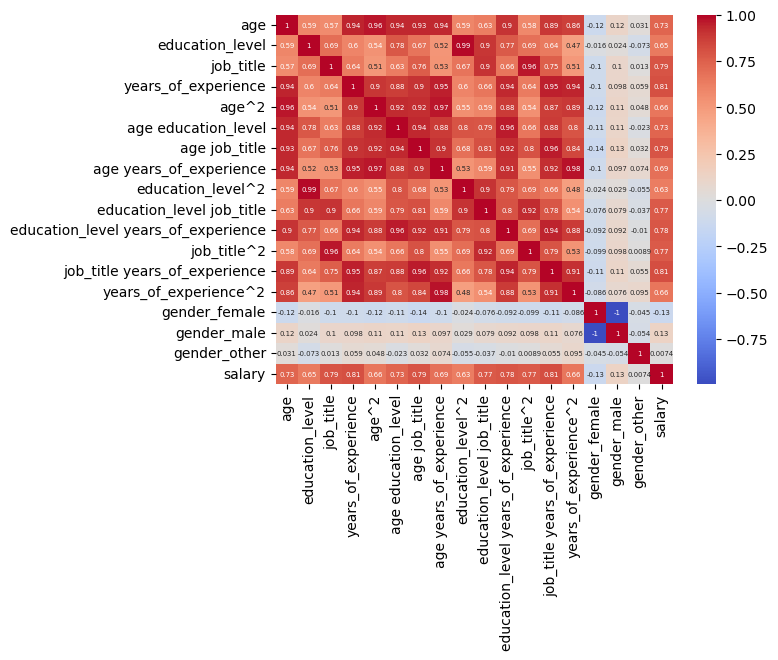

In [337]:
heatmap_df = X_train_.copy()
heatmap_df['salary'] = y_train
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 8})

## save fig
plt.savefig(os.path.join(images_dir, 'features_heatmap.png'),
            bbox_inches='tight')
## show fig
plt.show()


heatmap_poly_df = X_train_poly.copy()
heatmap_poly_df['salary'] = y_train
sns.heatmap(heatmap_poly_df.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 5})
## save fig
plt.savefig(os.path.join(images_dir, 'poly_features_heatmap.png'),
            bbox_inches='tight')
## show fig
plt.show()

<font size='6'>Training</font>

In [338]:
from skopt import BayesSearchCV
from skopt.space import (
    Real,
    Integer,
    Categorical
)

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error
)

/opt/anaconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ML_env/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


<font size='4'>Model Storage</font>

In [339]:
models_storage = {}

def store_model_mae(model, y_pred, name: str, model_params: dict):
    models_storage[name] = {
        'model': model,
        'mae': mean_absolute_error(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred),
        'params': {}
    }

    models_storage[name]['params'].update(model_params)
    
    print(f'name: {name}')
    for i, v in models_storage[name]['params'].items():
        if type(v) == float:
            print(f'{i}: {v:.4f}')
        else :
            print(f'{i}: {v}')

    print(f'mae: {models_storage[name]['mae']}', end='\n\n')



In [340]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_, y_train)
y_pred_ols = linear_model.predict(X_test_)
store_model_mae(linear_model, y_pred_ols, 'linear_model', {})


linear_model_poly = LinearRegression()
linear_model_poly.fit(X_train_poly, y_train)
y_pred_ols_poly = linear_model_poly.predict(X_test_poly)
store_model_mae(linear_model_poly, y_pred_ols_poly, 'linear_model_poly', {})

name: linear_model
mae: 17812.576704364295

name: linear_model_poly
mae: 15917.459581186726



In [341]:
from sklearn.linear_model import Ridge

params_space = {
    'alpha': Real(low=1e-3, high=1e+2, prior='log-uniform'),
}

common_params = {
    'n_iter': 2,
    'cv': 5,
    'n_jobs': -1,
    'scoring': 'neg_mean_squared_error',
    'random_state': 23,
    'verbose': 0,
    'return_train_score': True,
}

ridge_model = BayesSearchCV(
    estimator=Ridge(),
    search_spaces=params_space,
    **common_params,
)
ridge_model.fit(X_train_, y_train)
y_pred_r = ridge_model.predict(X_test_)
store_model_mae(ridge_model, y_pred_r, 'ridge_model', dict(ridge_model.best_params_))



ridge_model_poly = BayesSearchCV(
    estimator=Ridge(),
    search_spaces=params_space,
    **common_params,
)
ridge_model_poly.fit(X_train_poly, y_train)
y_pred_r_poly = ridge_model_poly.predict(X_test_poly)
store_model_mae(ridge_model_poly, y_pred_r_poly, 'ridge_model_poly', dict(ridge_model_poly.best_params_))

name: ridge_model
alpha: 0.0171
mae: 17812.242135952125

name: ridge_model_poly
alpha: 0.0082
mae: 15913.222238729593



In [342]:
from sklearn.linear_model import Lasso

params_space = {
    'alpha': Real(low=1e-3, high=1e+2, prior='log-uniform'),
    'selection': Categorical(['cyclic', 'random']),
}

common_params = {
    'n_iter': 1,
    'cv': 5,
    'n_jobs': -1,
    'scoring': 'neg_mean_squared_error',
    'verbose': 0,
    'random_state': 24,
}

lasso_model = BayesSearchCV(
    estimator=Lasso(max_iter=int(1e+6)),
    search_spaces=params_space,
    **common_params,
)
lasso_model.fit(X_train_, y_train)
y_pred_la = lasso_model.predict(X_test_)
store_model_mae(lasso_model, y_pred_la, 'lasso_model', dict(lasso_model.best_params_))


lasso_model_poly = BayesSearchCV(
    estimator=Lasso(max_iter=int(1e+6)),
    search_spaces=params_space,
    **common_params,
)
lasso_model_poly.fit(X_train_poly, y_train)
y_pred_la_poly = lasso_model_poly.predict(X_test_poly)
store_model_mae(lasso_model_poly, y_pred_la_poly, 'lasso_model_poly', dict(lasso_model_poly.best_params_))

name: lasso_model
alpha: 0.0205
selection: cyclic
mae: 17812.548635128514

name: lasso_model_poly
alpha: 0.0205
selection: cyclic
mae: 15917.374718831876



In [343]:
from sklearn.linear_model import ElasticNet

params_space = {
    'alpha': Real(low=1e-3, high=1e+2, prior='log-uniform'),
    'l1_ratio': Real(low=0.01, high=0.99),
    'selection': Categorical(['cyclic', 'random']),
}

common_params = {
    'n_iter': 1,
    'cv': 5,
    'n_jobs': -1,
    'scoring': 'neg_mean_squared_error',
    'random_state': 43,
    'verbose': 0,
}

elastic_model = BayesSearchCV(
    estimator=ElasticNet(max_iter=int(1e+6)),
    search_spaces=params_space,
    **common_params,
)

elastic_model.fit(X_train_, y_train)
y_pred_e = elastic_model.predict(X_test_)
store_model_mae(elastic_model, y_pred_e, 'elastic_model', dict(elastic_model.best_params_))

elastic_model_poly = BayesSearchCV(
    estimator=ElasticNet(max_iter=int(1e+6)),
    search_spaces=params_space,
    **common_params,
)

elastic_model_poly.fit(X_train_poly, y_train)
y_pred_e_poly = elastic_model_poly.predict(X_test_poly)
store_model_mae(elastic_model_poly, y_pred_e_poly, 'elastic_model_poly', dict(elastic_model_poly.best_params_))

name: elastic_model
alpha: 0.4034
l1_ratio: 0.2583
selection: cyclic
mae: 30573.351622852122

name: elastic_model_poly
alpha: 0.4034
l1_ratio: 0.2583
selection: cyclic
mae: 28202.790371968757



In [344]:
from sklearn.linear_model import SGDRegressor

params_space = [
    {
        'penalty': Categorical(['elasticnet']),
        'alpha': Real(1e-5, 1e+2, prior='log-uniform'),
        'l1_ratio': Real(0.01, 0.99),
        'learning_rate': Categorical(['adaptive', 'constant', 'invscaling']),
        'eta0': Real(1e-5, 1, prior='log-uniform'),
    },
    {
        'penalty': Categorical(['l1']),
        'alpha': Real(1e-5, 1e+2, prior='log-uniform'),
        'learning_rate': Categorical(['adaptive', 'constant', 'invscaling']),
        'eta0': Real(1e-5, 1, prior='log-uniform'),
    },
    {
        'penalty': Categorical(['l2']),
        'alpha': Real(1e-5, 1e+2, prior='log-uniform'),
        'learning_rate': Categorical(['adaptive', 'constant', 'invscaling']),
        'eta0': Real(1e-5, 1, prior='log-uniform'),
    },
]

common_params = {
    'n_iter': 1,
    'cv': 5,
    'n_jobs': -1,
    'scoring': 'neg_mean_squared_error',
    'random_state': 23,
    'verbose': 0,
}

SGD_model = BayesSearchCV(
    estimator=SGDRegressor(max_iter=int(1e+6), early_stopping=True),
    search_spaces=params_space,
    **common_params,
)
SGD_model.fit(X_train_, y_train)
y_pred_sgd = SGD_model.predict(X_test_)
store_model_mae(SGD_model, y_pred_sgd, 'SGD_model', dict(SGD_model.best_params_))


SGD_model_poly = BayesSearchCV(
    estimator=SGDRegressor(max_iter=int(1e+6), early_stopping=True),
    search_spaces=params_space,
    **common_params,
)
SGD_model_poly.fit(X_train_poly, y_train)
y_pred_sgd_poly = SGD_model_poly.predict(X_test_poly)
store_model_mae(SGD_model_poly, y_pred_sgd_poly, 'SGD_model_poly', dict(SGD_model_poly.best_params_))

name: SGD_model
alpha: 1.7471
eta0: 0.0025
learning_rate: adaptive
penalty: l1
mae: 17839.56582653752

name: SGD_model_poly
alpha: 1.7471
eta0: 0.0025
learning_rate: adaptive
penalty: l1
mae: 17549.51389995406



In [345]:
from sklearn.ensemble import RandomForestRegressor

params_space = {
    'n_estimators': Integer(100, 500),
    'criterion': Categorical(['squared_error', 'absolute_error', 'friedman_mse', 'poisson']),
    'max_depth': Integer(5, 30),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
}

common_params = {
    'n_iter': 1,
    'cv': 5,
    'scoring': 'neg_mean_squared_error',
    'n_jobs': -1,
    'random_state': 43,
    'verbose': 0,
}

rf_model = BayesSearchCV(
    estimator=RandomForestRegressor(),
    search_spaces=params_space,
    **common_params,
)

rf_model.fit(X_train_, y_train)
y_pred_rf = rf_model.predict(X_test_)
store_model_mae(rf_model, y_pred_rf, 'randomForest', dict(rf_model.best_params_))


rf_model_poly = BayesSearchCV(
    estimator=RandomForestRegressor(),
    search_spaces=params_space,
    **common_params,
)

rf_model_poly.fit(X_train_poly, y_train)
y_pred_rf_poly = rf_model_poly.predict(X_test_poly)
store_model_mae(rf_model_poly, y_pred_rf_poly, 'randomForest_poly', dict(rf_model_poly.best_params_))

name: randomForest
criterion: friedman_mse
max_depth: 11
min_samples_leaf: 3
min_samples_split: 5
n_estimators: 457
mae: 4402.4705280802455

name: randomForest_poly
criterion: friedman_mse
max_depth: 11
min_samples_leaf: 3
min_samples_split: 5
n_estimators: 457
mae: 4725.637221389375



In [346]:
import xgboost as xgb

params_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(5, 30),
    'subsample': Real(0.9, 1),
    'colsample_bytree': Real(0.9, 1),
    'reg_lambda': Real(0, 10),
    'reg_alpha': Real(0, 10),
    'gamma': Integer(0, 5),
}

common_params = {
    'n_iter': 1,
    'cv': 5,
    'scoring': 'neg_mean_squared_error',
    'n_jobs': -1,
    'random_state': 43,
    'verbose': 0,
}

xgb_rf_model = BayesSearchCV(
    estimator=xgb.XGBRFRegressor(),
    search_spaces=params_space,
    **common_params,
)

xgb_rf_model.fit(X_train_, y_train)
y_pred_xgb_rf = xgb_rf_model.predict(X_test_)
store_model_mae(xgb_rf_model, y_pred_xgb_rf, 'xgb_randomForest', dict(xgb_rf_model.best_params_))


xgb_rf_model_poly = BayesSearchCV(
    estimator=xgb.XGBRFRegressor(),
    search_spaces=params_space,
    **common_params,
)

xgb_rf_model_poly.fit(X_train_poly, y_train)
y_pred_xgb_rf_poly = xgb_rf_model_poly.predict(X_test_poly)
store_model_mae(xgb_rf_model_poly, y_pred_xgb_rf_poly, 'xgb_randomForest_poly', dict(xgb_rf_model_poly.best_params_))

name: xgb_randomForest
colsample_bytree: 0.9521
gamma: 1
max_depth: 11
n_estimators: 271
reg_alpha: 8.9330
reg_lambda: 7.9480
subsample: 0.9754
mae: 10905.013671875

name: xgb_randomForest_poly
colsample_bytree: 0.9521
gamma: 1
max_depth: 11
n_estimators: 271
reg_alpha: 8.9330
reg_lambda: 7.9480
subsample: 0.9754
mae: 9146.453125



In [347]:
import lightgbm as lgb

params_space = {
    'boosting_type': Categorical(['gbdt', 'dart', 'rf']),
    'num_leaves': Integer(20,100),
    'max_depth': Integer(5, 30),
    'learning_rate': Real(1e-2, 1e+2),
    'n_estimators': Integer(100, 500),
    'subsample': Real(0.9, 1),
    'subsample_freq': Integer(0, 7),
    'colsample_bytree': Real(0.9, 1),
    'reg_alpha': Real(0, 10),
    'reg_lambda': Real(0, 10),
    'bagging_freq': Integer(1, 7),
    'bagging_fraction': Real(0.5, 0.99),
    'feature_fraction': Real(0.5, 0.99),
}

common_params = {
    'n_iter': 1,
    'cv': 5,
    'scoring': 'neg_mean_squared_error',
    'n_jobs': -1,
    'random_state': 43,
    'verbose': 0,
}

lgb_rf_model = BayesSearchCV(
    estimator=lgb.LGBMRegressor(verbose=-1),
    search_spaces=params_space,
    **common_params,
)

lgb_rf_model.fit(X_train_, y_train)
y_pred_lgb_rf = lgb_rf_model.predict(X_test_)
store_model_mae(lgb_rf_model, y_pred_lgb_rf, 'lgb_randomForest', dict(lgb_rf_model.best_params_))


lgb_rf_model_poly = BayesSearchCV(
    estimator=lgb.LGBMRegressor(verbose=-1),
    search_spaces=params_space,
    **common_params,
)

lgb_rf_model_poly.fit(X_train_poly, y_train)
y_pred_lgb_rf_poly = lgb_rf_model_poly.predict(X_test_poly)
store_model_mae(lgb_rf_model_poly, y_pred_lgb_rf_poly, 'lgb_randomForest_poly', dict(lgb_rf_model_poly.best_params_))

name: lgb_randomForest
bagging_fraction: 0.7554
bagging_freq: 3
boosting_type: gbdt
colsample_bytree: 0.9428
feature_fraction: 0.9377
learning_rate: 79.4819
max_depth: 24
n_estimators: 152
num_leaves: 26
reg_alpha: 1.0443
reg_lambda: 2.1683
subsample: 0.9048
subsample_freq: 1
mae: 4.366828604207454e+38

name: lgb_randomForest_poly
bagging_fraction: 0.7554
bagging_freq: 3
boosting_type: gbdt
colsample_bytree: 0.9428
feature_fraction: 0.9377
learning_rate: 79.4819
max_depth: 24
n_estimators: 152
num_leaves: 26
reg_alpha: 1.0443
reg_lambda: 2.1683
subsample: 0.9048
subsample_freq: 1
mae: 4.398143211873469e+38



In [348]:
import keras_tuner as kt
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Activation, LeakyReLU
from tensorflow.keras.activations import swish
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mse, mae
import os

## remove history of tuner
# if os.path.isfile('untitled_project/tuner0.json'):
#     os.remove('untitled_project/tuner0.json')

class BTuner(kt.BayesianOptimization):
    def run_trial(self, trial, *args, **kwargs):
        hp = trial.hyperparameters

        batch_size = hp.Choice('batch_size', [32, 64, 128])
        epochs = hp.Int('epochs', 30, 100, step=10)

        return super().run_trial(
            trial,
            *args,
            batch_size=batch_size,
            epochs=epochs,
            **kwargs,
        )

def build_baseModel(hp, input_size):
    model = Sequential()
    model.add(Input(shape=(input_size,)))

    n_layers = 5

    for i in range(1, n_layers + 1):
        hp_units = hp.Choice(f'unit_{i}', [32, 64, 125, 256, 512, 1024])
        hp_actif = hp.Choice(f'acti_{i}', ['relu', 'tanh', 'leaky_relu', 'swish'])
        model.add(Dense(units=hp_units))
        if hp_actif == 'leaky_relu':
            model.add(LeakyReLU())
        elif hp_actif == 'swish':
            model.add(Activation('swish'))
        else :
            model.add(Activation(hp_actif))

    model.add(Dense(units=1, activation=hp.Choice('acti_output', ['linear', 'relu'])))

    lr = hp.Float('learning_rate', 1e-4, 1e+2, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='mse',
        metrics=['mae'],
    )
    return model

def build_model(hp):
    return build_baseModel(hp, X_train_.shape[1])

def build_model_poly(hp):
    return build_baseModel(hp, X_train_poly.shape[1])


tuner = BTuner(
    hypermodel=build_model,
    objective=kt.Objective('val_mae', direction='min'),
    max_trials=1,
    # num_initial_points=10,
    project_name='non_poly',
    overwrite=True,
)

tuner.search(
    X_train_, y_train,
    validation_split=0.1,
    shuffle=True,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)],
    verbose=2,
)


tuner_poly = BTuner(
    hypermodel=build_model_poly,
    objective=kt.Objective('val_mae', direction='min'),
    max_trials=1,
    project_name='poly',
    overwrite=True,
)

tuner_poly.search(
    X_train_poly, y_train,
    validation_split=0.1,
    shuffle=True,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)],
    verbose=2,
)

Trial 1 Complete [00h 00m 10s]
val_mae: 115720.890625

Best val_mae So Far: 115720.890625
Total elapsed time: 00h 00m 10s


In [349]:
from tensorflow.keras.models import load_model

## load stored model
# model_dir = os.path.join(os.getcwd(), 'models')
# NN_model = load_model(os.path.join(model_dir, 'NN_model.keras'))

## get best model from tuner
NN_model = tuner.get_best_models(num_models=1)[0]

NN_model_poly = tuner_poly.get_best_models(num_models=1)[0]

## show best model summary
# NN_model.summary()

## evaluate best model
# loss, mae = NN_model.evaluate(X_test_, y_test, verbose=0)
# print(f'mae: {mae}')

## get best parameters from tuner
NN_hyperparms = tuner.get_best_hyperparameters(num_trials=1)[0].values

NN_hyperparms_poly = tuner_poly.get_best_hyperparameters(num_trials=1)[0].values

## use best model to predict
y_pred_NN = NN_model.predict(X_test_)
store_model_mae(NN_model,
                y_pred_NN,
                'NN_model',
                NN_hyperparms)

y_pred_NN_poly = NN_model_poly.predict(X_test_poly)
store_model_mae(NN_model_poly,
                y_pred_NN_poly,
                'NN_model_poly',
                NN_hyperparms_poly)





/opt/anaconda3/envs/ML_env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
name: NN_model
unit_1: 256
acti_1: relu
unit_2: 64
acti_2: relu
unit_3: 64
acti_3: swish
unit_4: 512
acti_4: swish
unit_5: 125
acti_5: tanh
acti_output: linear
learning_rate: 0.0008
batch_size: 32
epochs: 30
mae: 114553.1796875

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
name: NN_model_poly
unit_1: 1024
acti_1: relu
unit_2: 1024
acti_2: tanh
unit_3: 1024
acti_3: relu
unit_4: 125
acti_4: relu
unit_5: 125
acti_5: leaky_relu
acti_output: relu
learning_rate: 1.4113
batch_size: 32
epochs: 30
mae: 114997.6015625



In [350]:
print(*models_storage, sep='\n\n')

linear_model

linear_model_poly

ridge_model

ridge_model_poly

lasso_model

lasso_model_poly

elastic_model

elastic_model_poly

SGD_model

SGD_model_poly

randomForest

randomForest_poly

xgb_randomForest

xgb_randomForest_poly

lgb_randomForest

lgb_randomForest_poly

NN_model

NN_model_poly


<font size='6'>Model Selection</font>

In [351]:
## get the model with the minimum mae
best_of_all_model = min(models_storage.values(), key=lambda x: x['mae'])['model']
best_model_name = min(models_storage.keys(), key=lambda x: models_storage[x]['mae'])
print(f'best model: {best_model_name}')

if 'poly' in best_model_name:
    y_pred = best_of_all_model.predict(X_test_poly)
else :
    y_pred = best_of_all_model.predict(X_test_)
    
print(f'    mse: {mean_squared_error(y_test, y_pred)}')
print(f'    mae: {mean_absolute_error(y_test, y_pred)}')

best model: randomForest
    mse: 83093634.23609951
    mae: 4402.4705280802455


<font size='6'>Save Model</font>

In [352]:
import joblib

## save model
def save_model(model, name: str):
    os.makedirs(name='best_performance', mode=0o755, exist_ok=True)
    model_store_dir = os.path.join(os.getcwd(), 'best_performance')
    if 'NN' in name:
        # keras save
        best_of_all_model.save(f'best_performance/{best_model_name}.keras')
        pass
    else :
        joblib.dump(best_of_all_model, f'best_performance/{best_model_name}.joblib')


<font size='6'>Predict</font>

Given an exmaple, we should predict it</br>
assume example has no NaN

In [353]:
example_cols = df.columns.difference(['salary'], sort=False)

In [354]:
example_dataset = np.array([
    [26, 'Male', "Master", "Data Scientist", 0],
    [26, 'Female', "Master", "Data Scientist", 0],
    [27, 'male', "Master's", "Data Scientist", 0],
    [27, 'Female', "Master", "Data Scientist", 0],
    [37, 'Male', "Master", "Data Scientist", 11],
    [27, 'Female', "Master", "Data Scientist", 1],
])

example_df = pd.DataFrame(example_dataset, columns=example_cols)

## data cleansing
data_cleaning(example_df)

## data transformation
example_df_ = preprocessor.transform(example_df)
if 'poly' in best_model_name:
    example_df_ = poly_transformer.transform(example_df_)
example_df_



rename column - Successful ...
cleaning age - Successful ...
cleaning gender - Successful ...
cleaning education level - Successful ...
cleaning job title - Successful ...
cleaning years of experience - Successful ...
... Finishing Cleaning Process ...


,age,years_of_experience,gender_female,gender_male,gender_other,education_level,job_title
0,0.121951,0.000000,0.0,1.0,0.0,3.0,0.802636
1,0.121951,0.000000,1.0,0.0,0.0,3.0,0.802636
2,0.146341,0.000000,0.0,1.0,0.0,3.0,0.802636
3,0.146341,0.000000,1.0,0.0,0.0,3.0,0.802636
4,0.390244,0.323529,0.0,1.0,0.0,3.0,0.802636
5,0.146341,0.029412,1.0,0.0,0.0,3.0,0.802636


In [355]:
y_pred_ex = best_of_all_model.predict(example_df_)
example_df['predict'] = y_pred_ex
print(f'model name: {best_model_name}')
print(f'mae: {models_storage[best_model_name]['mae']}')
print(example_df)

model name: randomForest
mae: 4402.4705280802455
   age  gender education_level       job_title  years_of_experience        predict
0   26    male          Master  Data Scientist                  0.0   67374.433805
1   26  female          Master  Data Scientist                  0.0   68592.344222
2   27    male          Master  Data Scientist                  0.0   67029.861081
3   27  female          Master  Data Scientist                  0.0   68247.771498
4   37    male          Master  Data Scientist                 11.0  146539.888381
5   27  female          Master  Data Scientist                  1.0   71875.587490
